# Fundamentos de Data Science
Analizando los Salarios en Ciencia de Datos en 2023

Requisitos:

Tu tarea es limpiar y explorar un dataset que contiene información sobre los salarios en el campo de la ciencia de datos para el año 2023. Este análisis es crucial para entender las tendencias salariales y los factores que influyen en las diferencias de salarios en esta industria.

El dataset puede ser encontrado aquí.

1. Limpieza de datos con Python:
- Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
- Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
- Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’).
- Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
- Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).
2. Exploración de datos con Python:
- Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
- Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
3. Análisis adicional:
- Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
- Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

Entrega:

- Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 4 visualizaciones.
- Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un TAG incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.
- NOTA: Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.

Notas:

- Para evitar que otros estudiantes copien tu trabajo, asegúrate de que el código no esté guardado en un repositorio público.
- Para minimizar la deducción de puntos, asegúrate de cargar los requisitos completos.
- Si tienes problemas para cargar archivos en la aplicación de exámenes, por favor NO desbloquees otro examen. Envía el archivo por correo electrónico a tu instructor.
- Puedes usar cualquier recurso que tengas disponible (notas de clase, Google, Stackoverflow, etc.) – PERO DEBES CITAR CUALQUIER FUENTE UTILIZADA. Puedes citar fuentes en forma de comentario de código o una celda de texto con enlaces a cualquier recurso que hayas utilizado. La falta de citas será considerada plagio y resultará en la falla del examen.
- No puedes recibir ayuda de ninguna otra persona en este código. Esto incluye compañeros de clase, exalumnos, tu instructor, etc. La colaboración con otra persona en este examen será considerada plagio y resultará en la falla del examen y puede resultar en la expulsión del programa.
- Se permite el uso de LLM (Copilot, GPT, etc.), pero solo como guía o para depuración. Se espera que los estudiantes pongan su máximo esfuerzo.

In [3]:
#Para empezar lo que haré es cargar el archivo
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/ds_salaries.csv') #Teoría quitada del bootcamp ("Introducción a pandas")
print(df.head()) #Imprimo las primeras 5 líneas para verificar que el archivo esté correctamente cargado

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

In [8]:
#Ahora me aseguro de que cada registro sea único
df_info = df.isnull().sum() #Con esto me fijo cuántos datos nulos hay en cada columna #Limpieza y manejo de datos faltantes (Bootcamp)
print(df_info) 

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [11]:
#Ahora veo si hay duplicados
df_duplicates = df.duplicated().sum() #Con esto veo la cantidad de duplicados que hay #Clases en vivo Bootcamp
print(f'La cantidad de duplicados es: {df_duplicates}')

La cantidad de duplicados es: 1171


In [13]:
#Ahora lo que haré es eliminar estos duplicados
df = df.drop_duplicates() #Con esto puedo eliminar los duplicados y guardarlo en df nuevamente #Clases en vivo Bootcamp
#Una vez hecho esto, me fijo la cantidad de duplicados
df_duplicates1 = df.duplicated().sum()
print(f'La nueva cantidad de duplicados es: {df_duplicates1}')

La nueva cantidad de duplicados es: 0


In [14]:
#Vemos los tipos de datos
df_tipos = df.dtypes #Esto quité de introducción a pandas Bootcamp
print(df_tipos)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [16]:
#Como puedo ver salary, salary_in_usd, work_year y remote_radio están bien porque figuran como enteros
#Los que dicen object es porque o hay una mezcla de datos o cadenas de texto, están bien mirando los datos
#Lo que no tenía que pasar es que en salary por ejemplo aparezca object, o  en año.
df_describe = df.describe() #Estoy viendo estadísticas descriptivas del dataFrame (Introduccion a pandas)
print(df_describe)


         work_year        salary  salary_in_usd  remote_ratio
count  2584.000000  2.584000e+03    2584.000000   2584.000000
mean   2022.301084  2.103653e+05  133409.280186     50.483746
std       0.749179  8.080375e+05   67136.837329     48.163707
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  9.000000e+04   84975.000000      0.000000
50%    2022.000000  1.346300e+05  130000.000000     50.000000
75%    2023.000000  1.825625e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


In [5]:
#Veo ahora la consistencia en valores categóricos
#Voy a verificar primero los valores únicos de cada columna que me interesa
unique_experience_level = df['experience_level'].unique()
unique_employment_type = df['employment_type'].unique()
unique_job_title = df['job_title'].unique()
unique_salary_currency = df['salary_currency'].unique()
unique_employee_residence = df['employee_residence'].unique()
unique_company_location = df['company_location'].unique()
unique_company_size = df['company_size'].unique()

print(unique_experience_level)
print(unique_employment_type)
print(unique_job_title)

['SE' 'MI' 'EN' 'EX']
['FT' 'CT' 'FL' 'PT']
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Database Engineer' 'Financial Data Analyst'
 'Data In

In [6]:
print(unique_salary_currency)
print(unique_employee_residence)
print(unique_company_location)
print(unique_company_size)

['EUR' 'USD' 'INR' 'HKD' 'CHF' 'GBP' 'AUD' 'SGD' 'CAD' 'ILS' 'BRL' 'THB'
 'PLN' 'HUF' 'CZK' 'DKK' 'JPY' 'MXN' 'TRY' 'CLP']
['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT']
['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']
['L' 'S' 'M']


In [9]:
#Como pude observar, el que puede necesitar corregir inconcistencia sería el job title
#Haré del employee_residence y el company_location también por ser largos y asegurar que no se me halla pasado ninguna inconcistencia
#Lo que se me ocurre es usar loc[] para filtrar una columna en específico y forzar a que sea como yo quiero
df.loc[: , 'job_title'] = df['job_title'].str.lower() #Sacado de Filtrado y Slicing en Pandas
df.loc[:, 'employee_residence'] = df ['employee_residence'].str.upper()
df.loc[: , 'company_location'] = df['company_location'].str.upper()
#Ahora verifico estos tres
unique_job_title1 = df['job_title'].unique()
unique_company_location1 = df['company_location'].unique()
unique_company_size1 = df['company_size'].unique()
print(unique_job_title1)


['principal data scientist' 'ml engineer' 'data scientist'
 'applied scientist' 'data analyst' 'data modeler' 'research engineer'
 'analytics engineer' 'business intelligence engineer'
 'machine learning engineer' 'data strategist' 'data engineer'
 'computer vision engineer' 'data quality analyst'
 'compliance data analyst' 'data architect'
 'applied machine learning engineer' 'ai developer' 'research scientist'
 'data analytics manager' 'business data analyst' 'applied data scientist'
 'staff data analyst' 'etl engineer' 'data devops engineer' 'head of data'
 'data science manager' 'data manager' 'machine learning researcher'
 'big data engineer' 'data specialist' 'lead data analyst'
 'bi data engineer' 'director of data science'
 'machine learning scientist' 'mlops engineer' 'ai scientist'
 'autonomous vehicle technician' 'applied machine learning scientist'
 'lead data scientist' 'cloud database engineer' 'financial data analyst'
 'data infrastructure engineer' 'software data engine

In [19]:
print(unique_company_location1)
print(unique_company_size1)

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']
['L' 'S' 'M']


In [20]:
#Vemos la cantidad de datos faltantes
df_faltantes = df.isnull().sum() #Limpieza de datos y manejo de datos faltantes (Bootcamp)
print(df_faltantes) 

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [21]:
#Como no los tengo, no hace falta que rellene nada
#Ahora haré la deteción de datos anómalos
#Veré cuanto es el promedio primero de salarios
salario_promedio = df['salary_in_usd'].mean() #Introduccion a pandas (Bootcamp)
print(salario_promedio)

133409.28018575851


In [36]:
#Filtraré donde el salario sea mayor a 1.000.000 Y veré la cantidad
filtro_salario = df[df['salary_in_usd'] > 1000000] #Filtrado y Slicing en Pandas (Bootcamp)
cantidad = len(filtro_salario) #Python fundamental (Bootcamp)
print(cantidad)

0


In [40]:
#Haré lo mismo para salary
filtro_salario1 = df[df['salary'] > 1000000] #Filtrado y slicing en Pandas (Bootcamp)
cantidad1 = len(filtro_salario1) #Bootcamp Python Fundamentals
print(cantidad1)

53


In [41]:
#Como veo hay 53 datos anómalos para salary que los voy a adaptar
df = df[df['salary'] < 1000000] #Filtrado y slicing en Pandas (Bootcamp) Con esto hago que el df tome solo los menores a ese valor
#Nuevamente compruebo la cantidad
filtro_salario2 = df[df['salary'] > 1000000]
cantidad2 = len(filtro_salario2)
print(cantidad2)

0


2. Exploración de Datos

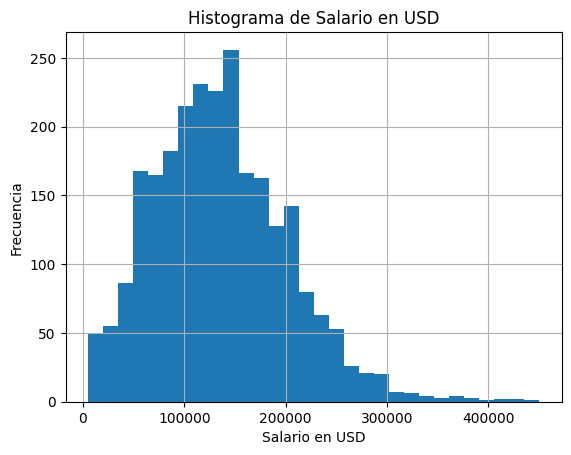

In [51]:
#Visualizaciones exploratorias univariadas
import matplotlib.pyplot as plt 
#Lo primero que se me ocurre es un histograma de salary in usd
plt.hist(df['salary_in_usd'], bins = 30) #Quitado de Histogramas y Boxplots en Matplotib (Bootcamp)
plt.title('Histograma de Salario en USD')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.grid(True) #Con esto estoy mostrando el grid 
plt.show()


In [50]:
#Lo que tengo es un sesgo positivo donde se ve que la mayoría de salarios se encuentran entre 50.000 y 200.000
#Tengo algunos valores de salario mayores pero con una menor frecuencia
#Puedo concluir que la mayoría de salarios se agrupan en un rango de 50.000 a 200.000.
#Los demás no son tan comunes. El valor más alto se encuentra en 150.000 de salario

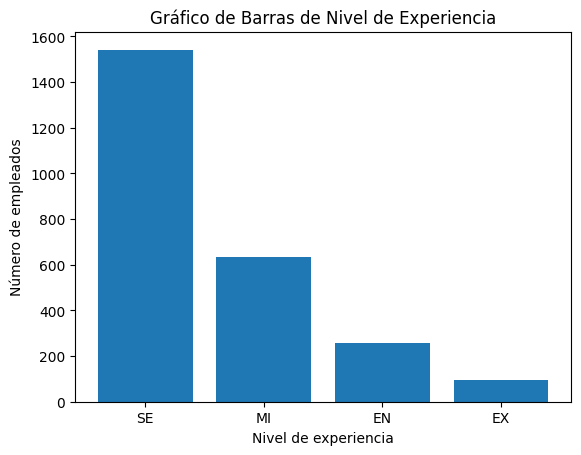

In [52]:
#Gráfico de barras de experience_level
frecuencia_experience = df['experience_level'].value_counts() #Con esto se la frecuencia de cada nivel de experiencia #Introducción a pandas (Bootcamp)
plt.bar(frecuencia_experience.index , frecuencia_experience.values) #Quitado de análisis exploratorio de datos (Bootcamp)
plt.title('Gráfico de Barras de Nivel de Experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Número de empleados')
plt.show()

In [53]:
#Como se observa, la categoría senior es el que más hay con una amplia diferencia.
#Luego viene el nivel medio y por último el junior y el ejecutivo
#Lo que podemos decir de esto es que hay una gran cantidad de empleados con experiencia avanzada en los trabajos vistos
#Esto hace que la carrera para un junior sea dificil porque hay muchos empleados senior. Pero no puede ser senior sin antes ser junior.
#El sector de ciencia de datos está dominado por empleados con mucha experiencia, lo que refleja que la demanda busca niveles avanzados
#con una gran experiencia en el campo.

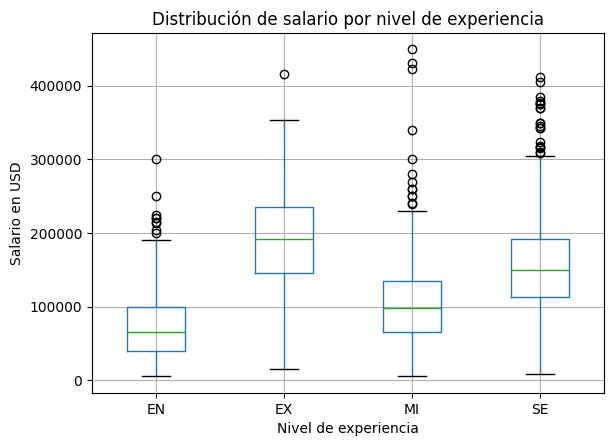

In [57]:
#Haré visualizaciones multivariadas ahora
#Un boxplot de salary_in_usd por experience_level
df.boxplot(column = 'salary_in_usd' , by = 'experience_level') #Histogramas y boxplots en Matplotlib (Bootcamp)
plt.title('Distribución de salario por nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario en USD')
plt.grid(True)
plt.suptitle('') #Como aparece automático, al ponerlo así estoy eliminándolo para que quede de una mejor manera
plt.show()

In [ ]:
#Las medianas están marcadas por lineas verdes, la mediana más baja es la de EN que sería el Junior, luego sube con MI, SE, y EX
#Esto tiene sentido ya que a mayor experiencia deberían pagarte mejor.
#El tamaño de la caja representa los rangos intercuartiles, en EX y en SE tenemos los más grandes, esto se entiende como que en estas
#dos categorías el rango de salarios varía más, hay más dispersión en los salarios.
#Hay valores que están muy por encima del rango esperado, esto indica la presencia de salarios demasiado altos en algunos niveles

In [58]:
#Eliminare en EN y en MI lo que están muy por encima, porque no puede ser que ganen más que un experto
df = df.loc[~((df['experience_level'] == 'MI') & (df['salary_in_usd'] > 200000))] #Filtrado y slicing en pandas (Bootcamp)
df = df.loc[~((df['experience_level'] == 'EN') & (df['salary_in_usd'] > 150000))] #Filtrado y slicing en pandas (Bootcamp)


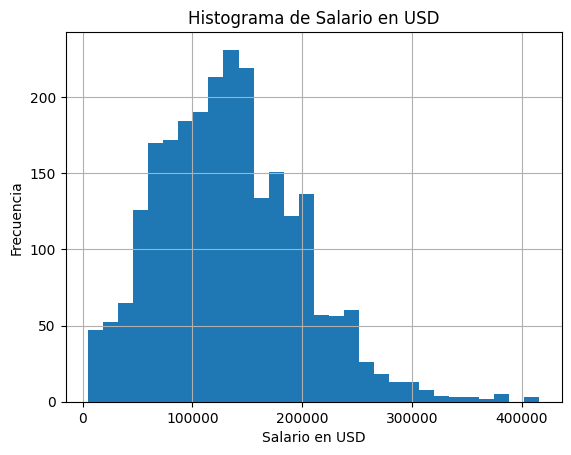

In [63]:
#Ahora vuelvo a hacer los gráficos, ya que está arreglado
#Lo primero que se me ocurre es un histograma de salary in usd
plt.hist(df['salary_in_usd'], bins = 30) #Quitado de Histogramas y Boxplots en Matplotib (Bootcamp)
plt.title('Histograma de Salario en USD')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.grid(True) #Con esto estoy mostrando el grid 
plt.show()

In [64]:
#Lo que tengo es un sesgo positivo donde se ve que la mayoría de salarios se encuentran entre 50.000 y 200.000
#Tengo algunos valores de salario mayores pero con una menor frecuencia
#Puedo concluir que la mayoría de salarios se agrupan en un rango de 50.000 a 200.000.
#Los demás no son tan comunes.

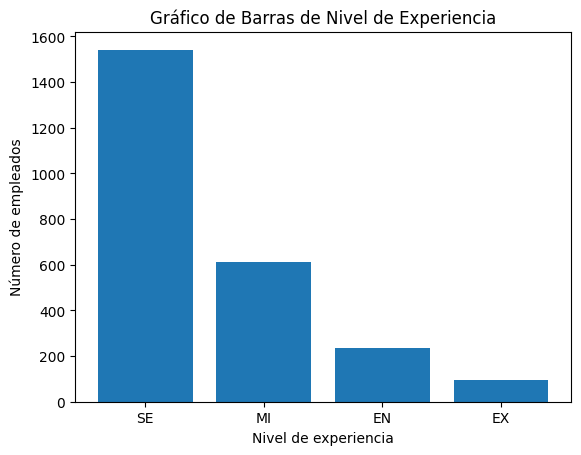

In [59]:
#Gráfico de barras de experience_level
frecuencia_experience = df['experience_level'].value_counts() #Con esto se la frecuencia de cada nivel de experiencia #Introducción a pandas (Bootcamp)
plt.bar(frecuencia_experience.index , frecuencia_experience.values) #Quitado de análisis exploratorio de datos (Bootcamp)
plt.title('Gráfico de Barras de Nivel de Experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Número de empleados')
plt.show()

In [60]:
#Como se observa, la categoría senior es el que más hay con una amplia diferencia.
#Luego viene el nivel medio y por último el junior y el ejecutivo
#Lo que podemos decir de esto es que hay una gran cantidad de empleados con experiencia avanzada en los trabajos vistos
#Esto hace que la carrera para un junior sea dificil porque hay muchos empleados senior. Pero no puede ser senior sin antes ser junior.
#El sector de ciencia de datos está dominado por empleados con mucha experiencia, lo que refleja que la demanda busca niveles avanzados
#con una gran experiencia en el campo.

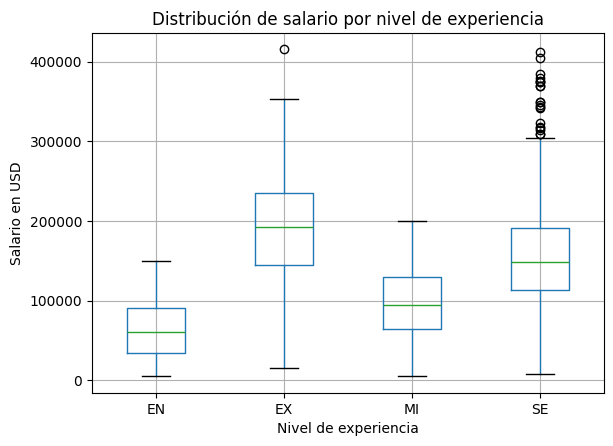

In [61]:
#Haré visualizaciones multivariadas ahora
#Un boxplot de salary_in_usd por experience_level
df.boxplot(column = 'salary_in_usd' , by = 'experience_level') #Histogramas y boxplots en Matplotlib (Bootcamp)
plt.title('Distribución de salario por nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario en USD')
plt.grid(True)
plt.suptitle('') #Como aparece automático, al ponerlo así estoy eliminándolo para que quede de una mejor manera
plt.show()

In [62]:
#Las medianas están marcadas por lineas verdes, la mediana más baja es la de EN que sería el Junior, luego sube con MI, SE, y EX
#Esto tiene sentido ya que a mayor experiencia deberían pagarte mejor.
#El tamaño de la caja representa los rangos intercuartiles, en EX y en SE tenemos los más grandes, esto se entiende como que en estas
#dos categorías el rango de salarios varía más, hay más dispersión en los salarios.

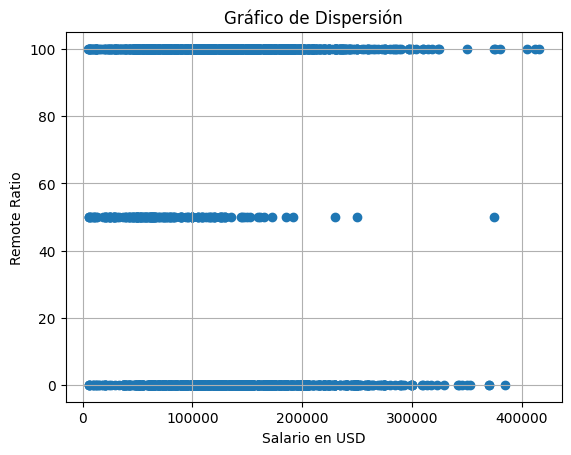

In [65]:
#Gráfico de dispersión de salary_in_usd contra remote_ratio
plt.scatter(df['salary_in_usd'] , df['remote_ratio']) #Análisis exploratorio de datos (Bootcamp)
plt.title('Gráfico de Dispersión')
plt.xlabel('Salario en USD')
plt.ylabel('Remote Ratio')
plt.grid(True)
plt.show()

In [66]:
#Como se puede observar, hay para 0%, para 50% y para 100% a lo largo del eje x (Salario en USD)
#Esto indica que para trabajos remotos también se paga una gran cantidad de salario
#Lo que se puede decir es que no importa si es remoto o no es remoto el trabajo, el salario que se percibe no tiene que ver con que si el 
#trabajo es remoto, más bien tiene que ver con el nivel de experiencia como se vió en gráficos anteriores

3. Análisis adicional

In [67]:
#Estadísticas descriptivas
estadisticas_descriptivas = df.describe()
print(estadisticas_descriptivas)

         work_year         salary  salary_in_usd  remote_ratio
count  2483.000000    2483.000000    2483.000000   2483.000000
mean   2022.312928  137077.399919  133623.674587     50.443012
std       0.739104   74195.936798   64511.059054     48.380345
min    2020.000000    6000.000000    5132.000000      0.000000
25%    2022.000000   86000.000000   85923.500000      0.000000
50%    2022.000000  130000.000000  130000.000000     50.000000
75%    2023.000000  175050.000000  175000.000000    100.000000
max    2023.000000  900000.000000  416000.000000    100.000000


In [74]:
#Ahora haremos para las columnas de interés
media_salary = df['salary_in_usd'].mean() #Introducción a pandas (Bootcamp) Todo esto y lo de abajo
mediana_salary = df['salary_in_usd'].median()
desviacion_salary = df['salary_in_usd'].std()
varianza_salary = df['salary_in_usd'].var()
max_salary = df['salary_in_usd'].max()
min_salary = df['salary_in_usd'].min()
salario_normalizado = df['salary_in_usd'].apply(lambda x : (x - min_salary) / (max_salary - min_salary)) #Aplicación de funciones con método apply (Bootcamp)

print('Análisis de salario:')
print(f'Media = {media_salary}')
print(f'Mediana = {mediana_salary}')
print(f'Desviación estandard = {desviacion_salary}')
print(f'Varianza = {varianza_salary}')
print(f'Salario maximo = {max_salary}')
print(f'Salario minimo = {min_salary}')
print(salario_normalizado)

Análisis de salario:
Media = 133623.67458719292
Mediana = 130000.0
Desviación estandard = 64511.059053925725
Varianza = 4161676740.259092
Salario maximo = 416000
Salario minimo = 5132
0       0.196450
1       0.060526
2       0.049573
3       0.413437
4       0.279574
          ...   
3749    0.389098
3750    0.990265
3751    0.355024
3752    0.243066
3753    0.230897
Name: salary_in_usd, Length: 2483, dtype: float64


In [72]:
#Remote ratio
mean_remote = df['remote_ratio'].mean() #Introducción a pandas (Bootcamp) Todo esto y lo de abajo
mediana_remote = df['remote_ratio'].median()
desviacion_remote = df['remote_ratio'].std()
varianza_remote = df['remote_ratio'].var()

print('Analisis de remote ratio: ')
print(f'Media = {mean_remote}')
print(f'Mediana = {mediana_remote}')
print(f'Desviación = {desviacion_remote}')
print(f'Varianza = {varianza_remote}')



Analisis de remote ratio: 
Media = 50.4430124848973
Mediana = 50.0
Desviación = 48.38034529376575
Varianza = 2340.657810744002


In [76]:
#Identificación de tendencias
#Primeramente hablaré de la tendencia en los salarios
#La media es mayor que la mediana, lo que esto dice es que está sesgada a la derecha.
#Tal y como estaba el gráfico que se hizo anteriormente. Hay salarios muy altos que lo que hacen 
#es elevar la media.

#Que la desviación estándar sea alta indica que hay una gran dispersión de salarios.
#Así se vio en el gráfico anterior también. Para SE y EX el rectángulo era grande, lo que indicaba
#que hay un rango de salarios variado para estas dos categorías (en el boxplot).

#El boxplot mostró que los salarios tienden a ser mayores cuando aumenta el nivel de experiencia.

#Tendencia del trabajo remoto
#La mayoría de trabajos se agrupan en 0%, 50% y 100% de trabajo remoto
#Viendo la correlación con el salario según el gráfico realizado se vió que no hay una clara relación
#entre el trabajo remoto y el salario (gráfico de dispersión).
#Lo que dice esto es que si un trabajo es remoto o no, no determina un factor importante para el salario.

#Impacto del nivel de experiencia
#Los niveles de experiencia más altos (SE Y EX), presentan salarios más altos y mayor dispersión (Boxplot).
#Lo que podemos concluir es que lo que más importa para el salario es el nivel de experiencia, no si es remoto.
#Hay una gran dispersión en los salarios en niveles altos de experiencia, esto se puede deber a una diversidad
#de roles por ejemplo, que uno tenga más responsabilidades que otro.

Bibliografía

- Introducción a pandas (Bootcamp)
- Limpieza y manejo de datos faltantes (Bootcamp)
- Clases en vivo Bootcamp
- Filtrado y Slicing en pandas (Bootcamp)
- Python Fundamentals (Bootcamp)
- Histogramas y Boxplots en Matplotib (Bootcamp)
- Análisis exploratorio de datos (Bootcamp)